In [1]:
import pandas as pd
import numpy as ny
import requests
from bs4 import BeautifulSoup
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
base_url='https://www.airlinequality.com/airline-reviews/british-airways'
pages=37
page_size=100
reviews=[]
for i in range(1,pages+1):
    #for i in range(1,pages+1):
    
    print(f"Scraping page {i}")
    
    #Create URL to collect links from paginated data
    url=f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    #Collect HTML data from this page
    response=requests.get(url)
    
    #Parse content
    content=response.content
    parsed_content=BeautifulSoup(content,'html.parser')
    for para in parsed_content.find_all("div",{"class":"text_content"}):
        reviews.append(para.get_text())
        
    print(f"    --->{len(reviews)}total reviews")

Scraping page 1
    --->100total reviews
Scraping page 2
    --->200total reviews
Scraping page 3
    --->300total reviews
Scraping page 4
    --->400total reviews
Scraping page 5
    --->500total reviews
Scraping page 6
    --->600total reviews
Scraping page 7
    --->700total reviews
Scraping page 8
    --->800total reviews
Scraping page 9
    --->900total reviews
Scraping page 10
    --->1000total reviews
Scraping page 11
    --->1100total reviews
Scraping page 12
    --->1200total reviews
Scraping page 13
    --->1300total reviews
Scraping page 14
    --->1400total reviews
Scraping page 15
    --->1500total reviews
Scraping page 16
    --->1600total reviews
Scraping page 17
    --->1700total reviews
Scraping page 18
    --->1800total reviews
Scraping page 19
    --->1900total reviews
Scraping page 20
    --->2000total reviews
Scraping page 21
    --->2100total reviews
Scraping page 22
    --->2200total reviews
Scraping page 23
    --->2300total reviews
Scraping page 24
    --->2400

In [4]:
df=pd.DataFrame()
df["reviews"]=reviews
df

,reviews
0,Not Verified | They lost my baggage in a very...
1,✅ Trip Verified | Late boarding led to a one ...
2,✅ Trip Verified | As usual the flight is delay...
3,✅ Trip Verified | I had the most fantastic BA...
4,✅ Trip Verified | Couldn’t book in online. Ar...
...,...
3614,YYZ to LHR - July 2012 - I flew overnight in p...
3615,LHR to HAM. Purser addresses all club passenge...
3616,My son who had worked for British Airways urge...
3617,London City-New York JFK via Shannon on A318 b...


In [5]:
df.to_csv("BA_reviews.csv")

In [6]:
df

,reviews
0,Not Verified | They lost my baggage in a very...
1,✅ Trip Verified | Late boarding led to a one ...
2,✅ Trip Verified | As usual the flight is delay...
3,✅ Trip Verified | I had the most fantastic BA...
4,✅ Trip Verified | Couldn’t book in online. Ar...
...,...
3614,YYZ to LHR - July 2012 - I flew overnight in p...
3615,LHR to HAM. Purser addresses all club passenge...
3616,My son who had worked for British Airways urge...
3617,London City-New York JFK via Shannon on A318 b...


# Read Dataset

In [7]:
reviews=pd.read_csv("BA_reviews.csv")
reviews=reviews.pop('reviews')
reviews

0       Not Verified |  They lost my baggage in a very...
1       ✅ Trip Verified |  Late boarding led to a one ...
2       ✅ Trip Verified | As usual the flight is delay...
3       ✅ Trip Verified |  I had the most fantastic BA...
4       ✅ Trip Verified |  Couldn’t book in online. Ar...
                              ...                        
3614    YYZ to LHR - July 2012 - I flew overnight in p...
3615    LHR to HAM. Purser addresses all club passenge...
3616    My son who had worked for British Airways urge...
3617    London City-New York JFK via Shannon on A318 b...
3618    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3619, dtype: object

# Clean text

In [8]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text

In [10]:
reviews=reviews.str.replace('Trip Verified |','')
reviews=reviews.str.replace('✅','')
reviews=reviews.str.replace('|','')
reviews=reviews.apply(remove_punctuations)
reviews

/var/folders/by/d5yw39fn6q1_crqq1blv8v840000gn/T/ipykernel_1999/1080520598.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews=reviews.str.replace('Trip Verified |','')
/var/folders/by/d5yw39fn6q1_crqq1blv8v840000gn/T/ipykernel_1999/1080520598.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews=reviews.str.replace('|','')


0       Not Verified   They lost my baggage in a very ...
1          Late boarding led to a one hour flight leav...
2         As usual the flight is delayed BA try to bla...
3          I had the most fantastic BA Flight today Th...
4          Couldn’t book in online Arrived at check in...
                              ...                        
3614    YYZ to LHR  July 2012  I flew overnight in pre...
3615    LHR to HAM Purser addresses all club passenger...
3616    My son who had worked for British Airways urge...
3617    London CityNew York JFK via Shannon on A318 bu...
3618    SINLHR BA12 B747436 First Class Old aircraft 1...
Name: reviews, Length: 3619, dtype: object

In [11]:
reviews.shape

(3619,)

In [19]:
freq_words=pd.Series(' '.join(reviews).lower().split()).value_counts()[:50]
freq_words

the        29151
to         19314
and        17911
a          13266
was        12756
i          10648
of          8354
in          8254
on          7827
flight      6427
for         6177
with        5789
not         4588
is          4587
were        4394
ba          4379
it          4278
that        4177
we          4134
my          4079
but         3894
at          3777
this        3541
they        3473
had         3457
as          3428
have        3297
from        3019
no          2907
very        2779
service     2756
seat        2337
be          2327
food        2315
london      2138
you         2135
so          2132
crew        2109
british     2101
airways     2084
seats       2072
are         2052
good        2039
an          2007
time        1994
cabin       1934
me          1919
which       1860
class       1822
there       1698
dtype: int64

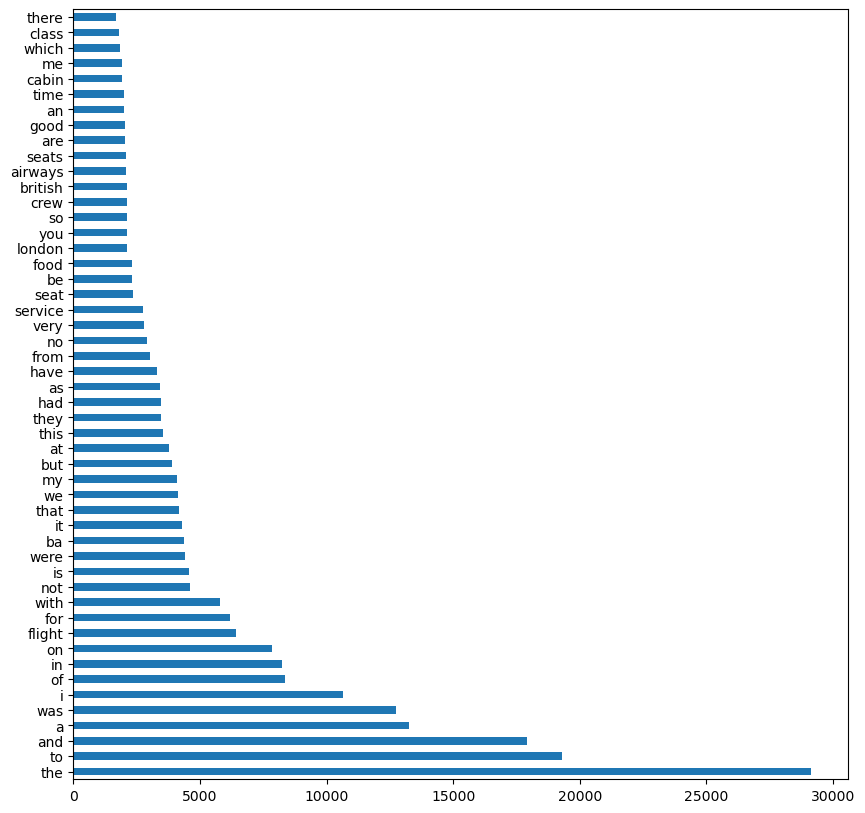

In [20]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0],y=freq_words[1])
plt.show()

# Text Clustering

In [21]:
categories=['negative','positive']
num_cat=len(categories)
num_cat

2

In [24]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

#Initialize regex tokenizer
tokenizer=RegexpTokenizer(r'\w+')


# #Vectorize document using TF-IDF 
tf_idf_vect=TfidfVectorizer(lowercase='True',
                           stop_words='english',
                           ngram_range=(1,1),
                           tokenizer=tokenizer.tokenize)

#Fit and transform text from data
reviews_counts=tf_idf_vect.fit_transform(reviews)

#Check shape of count vector
reviews_counts.shape

(3619, 15169)

In [25]:
#Import Kmeans model
from sklearn.cluster import KMeans

#Create KMeans Object and fit it to the training data 
kmeans=KMeans(n_clusters=num_cat).fit(reviews_counts)

#Get the labels using KMeans
pred_labels=kmeans.labels_
pred_labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int32)

In [29]:
clusters = kmeans.cluster_centers_
clusters

array([[4.52682168e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.63770831e-05],
       [2.20170301e-04, 6.78199891e-05, 6.25984187e-05, ...,
        6.21485223e-05, 8.98529908e-05, 0.00000000e+00]])

In [31]:
unique,counts=ny.unique(pred_labels,return_counts=True)
dict(zip(unique,counts))

{0: 1433, 1: 2186}

In [32]:
from sklearn import metrics

In [37]:
#Compute DBI score
#dbi=metrics.davies_bouldin_score(df_reviews_counts.toarray(),pred_lables)

#Compute Silhoutte Score
#ss=metrics.silhouette_score(df_reviews_counts.toarray(),pred_labels,metric='euclidean')

#Print thr DBI and Silhoutte Scores
#print("DBI Score: ",dbi,"\nSilhoutte Score: ",ss)

In [38]:
df_reviews=pd.DataFrame({'review':reviews,'label':pred_labels})
df_reviews

,review,label
0,Not Verified They lost my baggage in a very ...,0
1,Late boarding led to a one hour flight leav...,0
2,As usual the flight is delayed BA try to bla...,0
3,I had the most fantastic BA Flight today Th...,1
4,Couldn’t book in online Arrived at check in...,0
...,...,...
3614,YYZ to LHR July 2012 I flew overnight in pre...,1
3615,LHR to HAM Purser addresses all club passenger...,1
3616,My son who had worked for British Airways urge...,0
3617,London CityNew York JFK via Shannon on A318 bu...,1


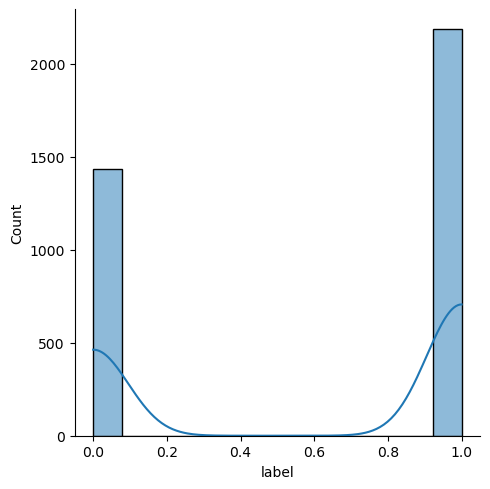

In [40]:
sns.displot(df_reviews['label'],kde='True')

In [41]:
positive_review=df_reviews[df_reviews['label']==1]
positive_review

,review,label
3,I had the most fantastic BA Flight today Th...,1
5,London Heathrow to Mumbai in a Boeing 7878 i...,1
6,Keflavík Iceland to London Heathrow on an A3...,1
14,Not Verified Fast and friendly check in tota...,1
15,I dont understand why British Airways is cl...,1
...,...,...
3613,HKGLHR in New Club World on Boeing 777300 260...,1
3614,YYZ to LHR July 2012 I flew overnight in pre...,1
3615,LHR to HAM Purser addresses all club passenger...,1
3617,London CityNew York JFK via Shannon on A318 bu...,1


In [42]:
negative_review=df_reviews[df_reviews['label']==0]
negative_review

,review,label
0,Not Verified They lost my baggage in a very ...,0
1,Late boarding led to a one hour flight leav...,0
2,As usual the flight is delayed BA try to bla...,0
4,Couldn’t book in online Arrived at check in...,0
7,Terrible Experience with British Airways I b...,0
...,...,...
3597,Im not normally one to whine but here goes LHR...,0
3608,Business LHR to BKK 747400 First try back with...,0
3609,This was a bmi Regional operated flight on a R...,0
3611,Just got back from Bridgetown Barbados flying ...,0
